# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

#from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&{units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
     
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | khorixas
Processing Record 7 of Set 1 | vilyuysk
Processing Record 8 of Set 1 | 'izbat al burj
City not found. Skipping...
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | altamont
Processing Record 16 of Set 1 | quellon
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | vydrino
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | kayangel
Processing Record 22 of Set 1

Processing Record 42 of Set 4 | stanley
Processing Record 43 of Set 4 | kurtamysh
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | cannonvale
Processing Record 46 of Set 4 | yashkul'
Processing Record 47 of Set 4 | umm kaddadah
Processing Record 48 of Set 4 | adrar
Processing Record 49 of Set 4 | dapaong
Processing Record 0 of Set 5 | limassol
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | acajutla
Processing Record 3 of Set 5 | stepnoye
Processing Record 4 of Set 5 | gebeit
Processing Record 5 of Set 5 | mata-utu
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | tulun
Processing Record 9 of Set 5 | empalme
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 5 | sena madureira
Processing Record 12 of Set 5 | yangambi
Processing Record 13 of Set 5 | la passe
Processing Record 14 of Set 5 | cidreira
Processing Record 15 of Set 5 | twon-brass
Processing 

Processing Record 32 of Set 8 | nevel'sk
Processing Record 33 of Set 8 | svetlyy
Processing Record 34 of Set 8 | camayenne
Processing Record 35 of Set 8 | yagry
City not found. Skipping...
Processing Record 36 of Set 8 | datong
Processing Record 37 of Set 8 | novo aripuana
Processing Record 38 of Set 8 | san patricio
Processing Record 39 of Set 8 | corumba
Processing Record 40 of Set 8 | greymouth
Processing Record 41 of Set 8 | nikolayevsk-on-amure
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | hammerfest
Processing Record 44 of Set 8 | waiuku
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | cabedelo
Processing Record 47 of Set 8 | suntar
Processing Record 48 of Set 8 | nabire
Processing Record 49 of Set 8 | tazacorte
Processing Record 0 of Set 9 | beyneu
Processing Record 1 of Set 9 | pisco
Processing Record 2 of Set 9 | lashio
Processing Record 3 of Set 9 | sandnessjoen
Processing Record 4 of Set 9 | mar del plata
Processing Record 5 of Set 

Processing Record 21 of Set 12 | colac
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | farah
Processing Record 24 of Set 12 | illizi
Processing Record 25 of Set 12 | tucuma
Processing Record 26 of Set 12 | galveston
Processing Record 27 of Set 12 | xai-xai
Processing Record 28 of Set 12 | egersund
Processing Record 29 of Set 12 | san martin
Processing Record 30 of Set 12 | ahwatukee foothills
Processing Record 31 of Set 12 | mopti
Processing Record 32 of Set 12 | kushiro
Processing Record 33 of Set 12 | kingscliff
Processing Record 34 of Set 12 | selkirk
Processing Record 35 of Set 12 | murray bridge
Processing Record 36 of Set 12 | kayes
Processing Record 37 of Set 12 | zvishavane
Processing Record 38 of Set 12 | vila velha
Processing Record 39 of Set 12 | valente
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,297.95,87,75,13.48,PN,1684884027
1,papatowai,-46.5619,169.4708,282.59,71,88,4.14,NZ,1684884016
2,waitangi,-43.9535,-176.5597,285.83,95,2,1.79,NZ,1684884013
3,karratha,-20.7377,116.8463,291.48,44,49,2.64,AU,1684884359
4,west island,-12.1568,96.8225,300.14,83,19,2.06,CC,1684884042


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,297.95,87,75,13.48,PN,1684884027
1,papatowai,-46.5619,169.4708,282.59,71,88,4.14,NZ,1684884016
2,waitangi,-43.9535,-176.5597,285.83,95,2,1.79,NZ,1684884013
3,karratha,-20.7377,116.8463,291.48,44,49,2.64,AU,1684884359
4,west island,-12.1568,96.8225,300.14,83,19,2.06,CC,1684884042


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

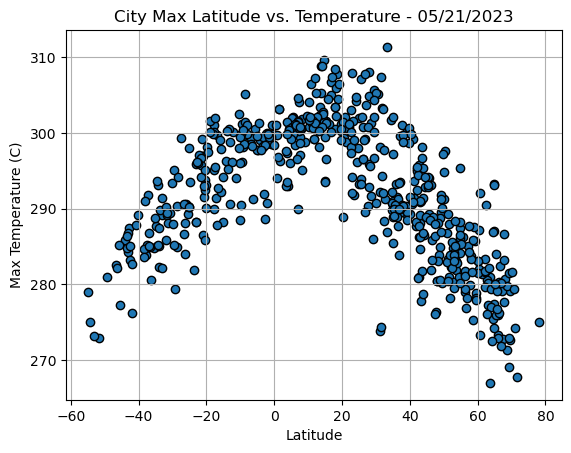

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature - 05/21/2023")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

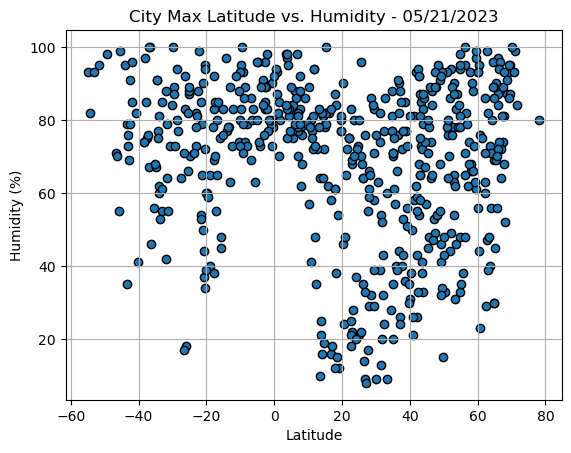

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity - 05/21/2023")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

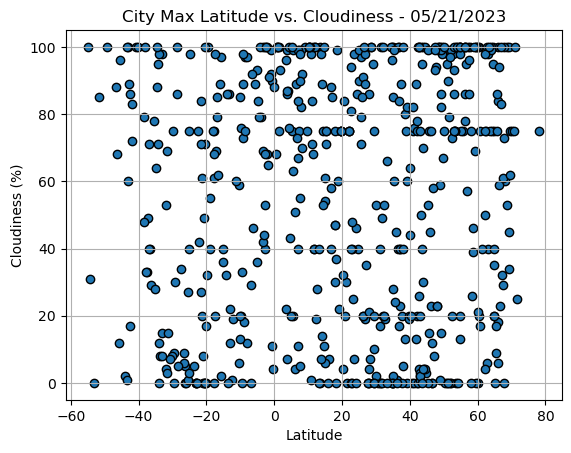

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness - 05/21/2023")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

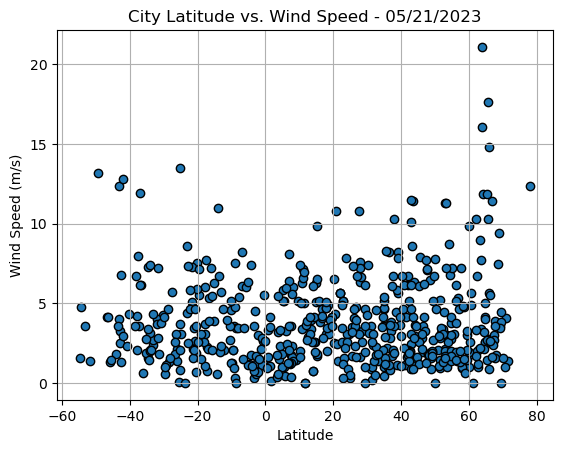

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed - 05/21/2023")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,vilyuysk,63.7553,121.6247,280.94,40,99,3.41,RU,1684884146
7,ribeira grande,38.5167,-28.7000,290.25,85,13,4.47,PT,1684884036
8,college,64.8569,-147.8028,293.20,30,20,2.57,US,1684884041
9,kodiak,57.7900,-152.4072,279.88,93,100,7.20,US,1684884072
10,utrik,11.2278,169.8474,301.08,77,71,7.16,MH,1684884025


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,297.95,87,75,13.48,PN,1684884027
1,papatowai,-46.5619,169.4708,282.59,71,88,4.14,NZ,1684884016
2,waitangi,-43.9535,-176.5597,285.83,95,2,1.79,NZ,1684884013
3,karratha,-20.7377,116.8463,291.48,44,49,2.64,AU,1684884359
4,west island,-12.1568,96.8225,300.14,83,19,2.06,CC,1684884042


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.6688566310066403


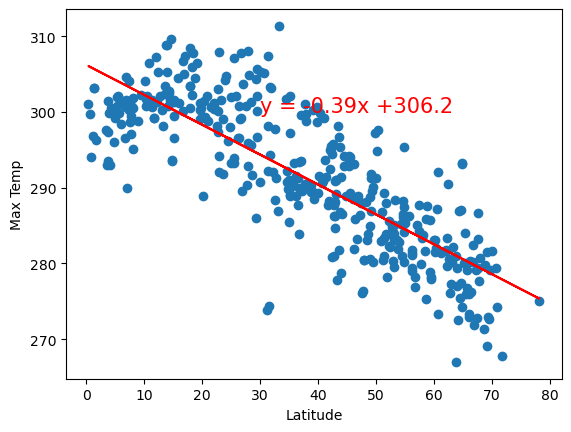

In [15]:
# Linear regression on Northern Hemisphere
regress_temp_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_temp_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_northern_hemi, (30, 300), fontsize=15, color="red")
plt.show()

The r-value is : 0.6562475135681904


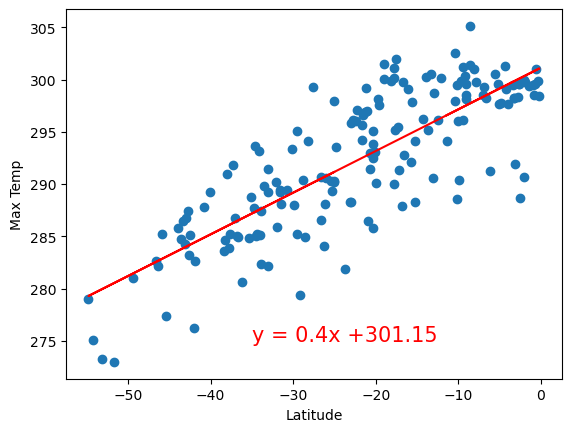

In [16]:
# Linear regression on Southern Hemisphere
regress_temp_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_temp_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_southern_hemi, (-35, 275), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

From the above liner regression plots, we can infer that that,

The cities' latitudes and max temperatures are negatively correlated for "northern hemisphere" as the r-value is around 0.66 and the line has a negative slope of -0.39


The cities' latitudes and max temperatures are positively correlated for "southern hemisphere" as the r-value is around 0.65 and the line has a positive slope of 0.4 


### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.004342753214012441


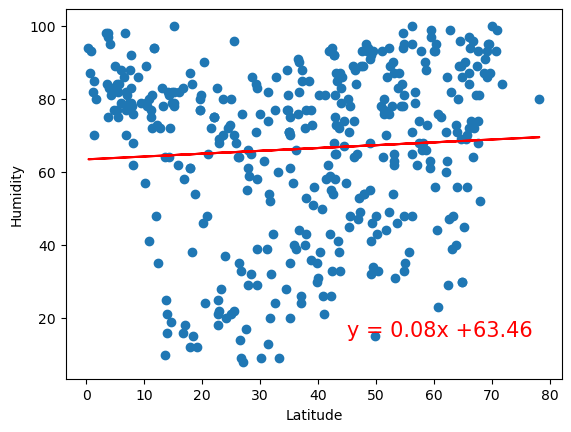

In [17]:
# Northern Hemisphere
regression_humidity_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_humidity_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.009998353637456348


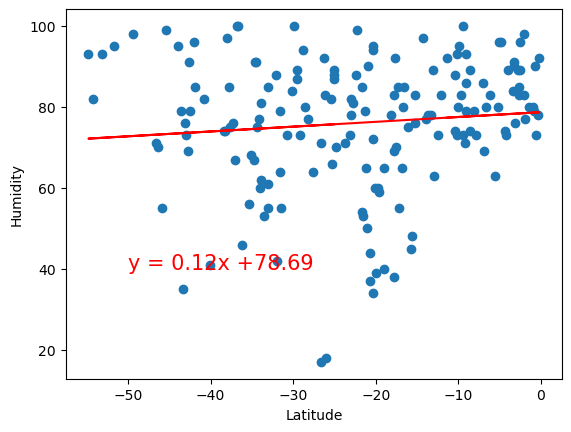

In [18]:
# Southern Hemisphere
regression_humidity_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_humidity_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_southern_hemi, (-50, 40), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

The cities' Latitudes and Humidity are slightly positively correlated for "northern hemisphere" as the r-value is around 0.04 and the line has a positive slope of 0.08 


The cities' latitudes and Humidity are slightly positively correlated for "southern hemisphere" as the r-value is around 0.01 and the line has a positive slope of 0.12 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 6.224362451081567e-05


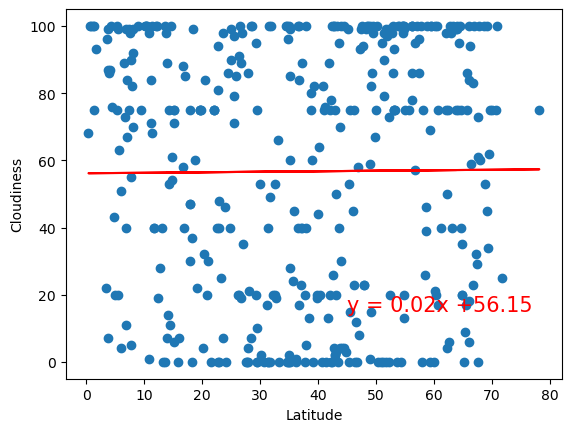

In [19]:
# Northern Hemisphere
regression_cloud_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_cloud_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.0036045941922007584


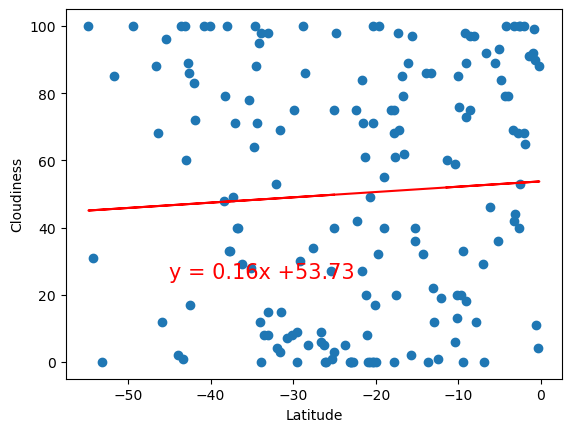

In [20]:
# Southern Hemisphere
regression_cloud_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_cloud_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_southern_hemi, (-45, 25), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

The cities' Latitudes and Cloudiness are  negatively correlated for "northern hemisphere" as the r-value is around 6.22e-05 and the line has a positive slope of 0.02 


The cities' Latitudes and Cloudiness are positively correlated for "southern hemisphere" as the r-value is around 0.003 and the line has a positive slope of 0.16

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.01864054503536161


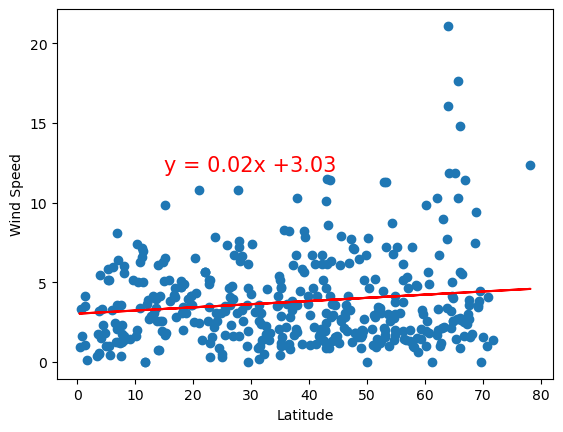

In [21]:
# Northern Hemisphere
regression_wind_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_wind_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_northern_hemi, (15,12), fontsize=15, color="red")
plt.show()

The r-value is : 0.02855191897435712


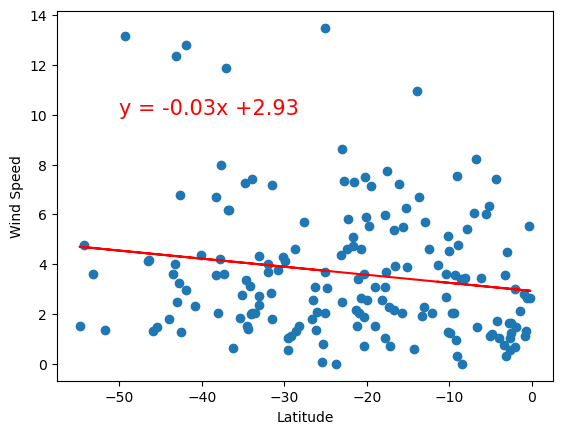

In [22]:
# Southern Hemisphere
regression_wind_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_wind_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_southern_hemi, (-50, 10), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

The cities' Latitudes and wind Speed are slightly positively correlated for "northern hemisphere" as the r-value is around 0.02 and the line has a positive slope of 0.02 


The cities' Latitudes and wind Speed are slightly negatively correlated for "southern hemisphere" as the r-value is around 0.03 and the line has a negativee slope of 0.03 